<a href="https://colab.research.google.com/github/RLAshish/OIPSIB_DataScience_Task-5/blob/main/Task_5_Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Loading Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('Advertising.csv')

# Display first few rows
print("First 5 rows:")
print(df.head())

# Dataset info
print("\nDataset Info:")
print(df.info())


First 5 rows:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


Exploratory Data Analysis (EDA)


Missing Values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Descriptive Statistics:
        Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


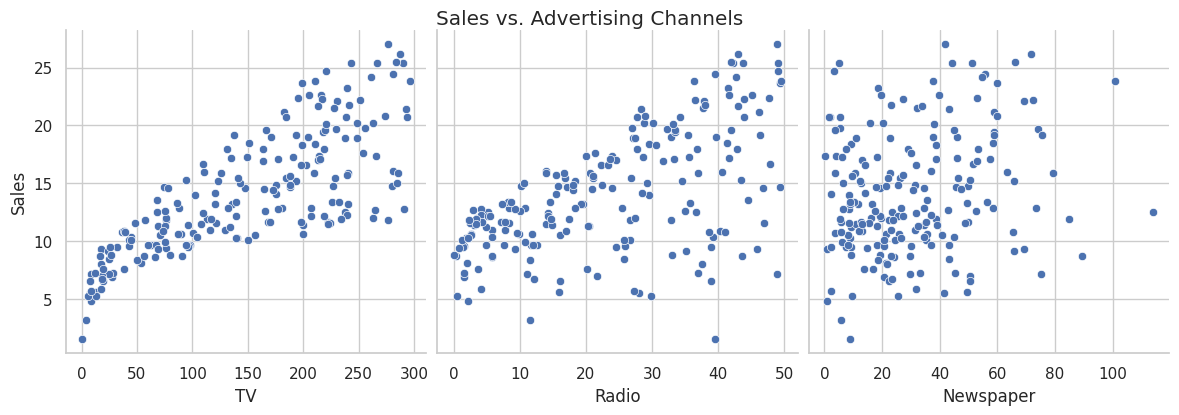

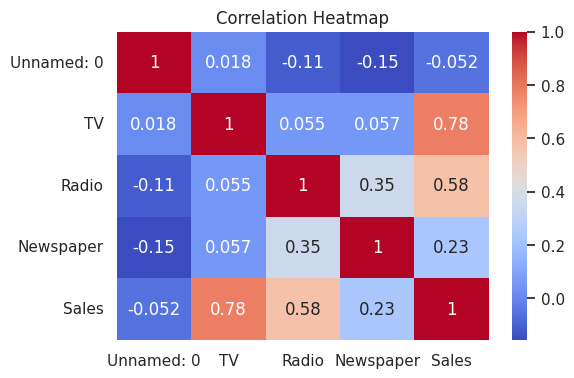

In [ ]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Basic statistical summary
print("\nDescriptive Statistics:\n", df.describe())

# Pairplot: Check relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle("Sales vs. Advertising Channels", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Feature Engineering and Splitting

In [ ]:
# Add interaction term (optional)
df['TV_Radio'] = df['TV'] * df['Radio']

# Define features and target
X = df[['TV', 'Radio', 'Newspaper', 'TV_Radio']]
y = df['Sales']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training and Evaluation

In [ ]:
# Create Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Evaluation metrics
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Model Coefficients: [0.01961507 0.03397467 0.00190677 0.00104987]
Model Intercept: 6.649882865325889
R² Score: 0.9741971529119294
RMSE: 0.9024580782957349


Visualization of Predictions

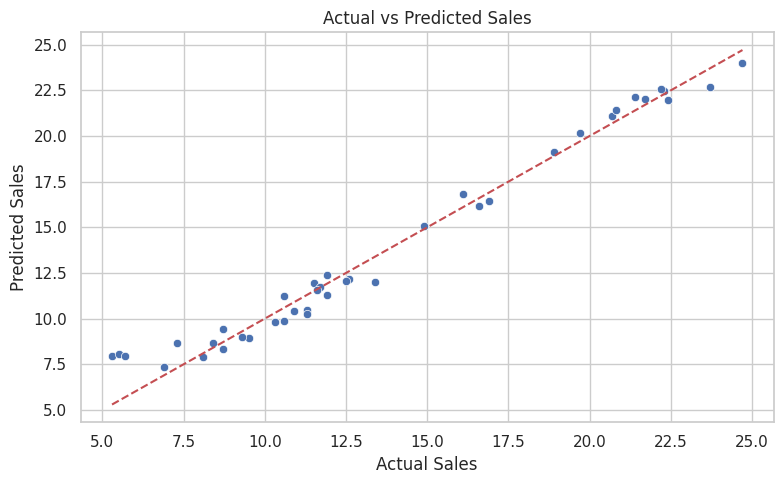

In [ ]:
# Plot: Actual vs Predicted Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.tight_layout()
plt.show()
